In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.options.display.max_columns=None

## 1. Import Dataset

### 1.1 US State Population

* Stores population by state from year 1990 to 2012

In [5]:
df = pd.read_csv('state-population.csv')
df.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


### 1.2 US Murder Rate by State

* Stores murder counts by state

In [6]:
murder_dataset = pd.read_csv('murders.csv')
murder_dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


### 1.3 Housing Dataset

* Stores housing information (location, housing median age, total number of rooms/bedrooms, etc)

In [7]:
housing_data = pd.read_csv('housing.csv')
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.4 German Credit Data

* Stores credit data of individuals, purpose of load

In [25]:
#this dataframe, however, does not contain any information about the credibility of indivials
german_dataset = pd.read_csv('german_credit_data.csv',  index_col=0)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [26]:
#this data contains credibility on individuals
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data'
dataset = pd.read_csv(path, delimiter=' ', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [27]:
#concat the two dataframes above to create a complete dataset
german_dataset = pd.concat([german_dataset, dataset.iloc[:,-1] - 1], axis=1)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,20
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


In [34]:
#give names 'Risk'
german_dataset.rename(columns={20:'Risk'}, inplace=True)
german_dataset.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1


# Exploratory Data Analysis (EDA)

The credibility and efficiency of machine learning algorithms is heavily dependent on both the quantity and quality of data in hands. Therefore, it is crucial we process our data well enough for machine learning algorithms to make complete use of. <br><br>

In Data Science, the purpose of data processing is to acquire data from the real world, process the data, create a well-organized dataset, and to make use of such data in machine learning algorithms. <br><br>

Data visualization and 5-number summary are commonly used to grasp a quick understanding of data.<br><br>

**5 Number Summary**:
1. The minimum value
2. The first quartile
3. The median
4. The third quartile
5. The maximum value

## 1. Type of Data

* Continuous : any value from a certain range
* Discrete : can only have integer values
* Categorical : ex. sex
* Binary : can only have two values 0/1, true/false. This is special case of categorical variables
* Ordinal : values with specific range of orders

## 3. Estimates of Location

### 3.1 Mean

In [18]:
df['population'].mean()

6805558.401347068

In [26]:
df.describe()

,year,population
count,2544.000000,2.524000e+03
mean,2001.500000,6.805558e+06
std,6.923547,2.855014e+07
min,1990.000000,1.013090e+05
25%,1995.750000,7.423805e+05
50%,2001.500000,1.597005e+06
75%,2007.250000,4.547104e+06
max,2013.000000,3.161288e+08


Year is a categorical variable<br>
수치형인지 아닌지 파악하기 위해 $\frac{a + b}{2}$가 의미가 있을때

### 3.2 Trimmed Mean

In [29]:
#왼쪽으로 10%, 오른쪽으로 10%를 제외하고 데이터의 80%만 쓰겠다는 의미
stats.trim_mean(df['population'], 0.1)

2620227.3605108056

### 3.3 Weighted Mean

### 3.4 Median

In [31]:
df['population'].median()

1597005.0

## 4. Estimates of Variation

### 4.1 Mean Absolute Deviation

In [33]:
df.population.mad()

8238925.345578629

### 4.2 Variance and Standard Deviation

In [38]:
df.population.std()

28550144.966823243

In [39]:
stats.trim_mean(df['population'], 0.1)

2620227.3605108056

## 5. Visualization

In [40]:
population = murder_dataset['population']

In [41]:
np.percentile(population, 25)

1696961.5

In [43]:
print(np.percentile(population, 50))
print(np.median(population))

4339367.0
4339367.0


In [42]:
np.percentile(population, 75)

6636084.5

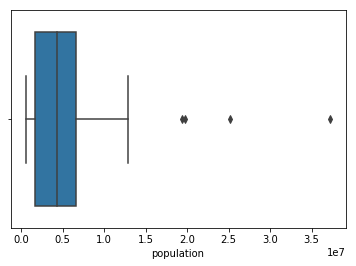

In [46]:
sns.boxplot(x=population)

Text(0, 0.5, 'frequency')

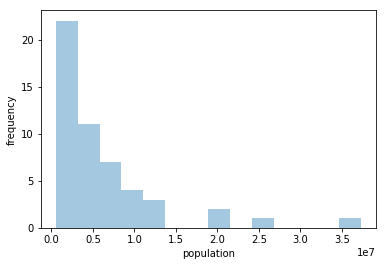

In [51]:
sns.distplot(population, kde=False)
plt.ylabel('frequency')

In [53]:
murder_dataset.head()

,state,abb,region,population,total
0,Alabama,AL,South,4779736,135
1,Alaska,AK,West,710231,19
2,Arizona,AZ,West,6392017,232
3,Arkansas,AR,South,2915918,93
4,California,CA,West,37253956,1257


In [54]:
murder_dataset['rate'] = murder_dataset['total'] / murder_dataset['population'] * 100000
murder_dataset.head()

,state,abb,region,population,total,rate
0,Alabama,AL,South,4779736,135,2.824424
1,Alaska,AK,West,710231,19,2.675186
2,Arizona,AZ,West,6392017,232,3.629527
3,Arkansas,AR,South,2915918,93,3.189390
4,California,CA,West,37253956,1257,3.374138


Text(0, 0.5, 'rate')

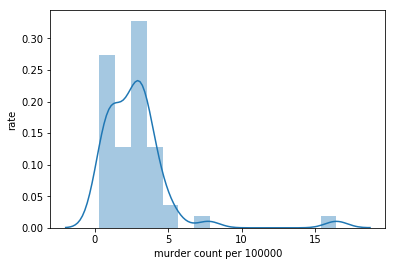

In [55]:
sns.distplot(murder_dataset.rate)
plt.xlabel('murder count per 100000')
plt.ylabel('rate')

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

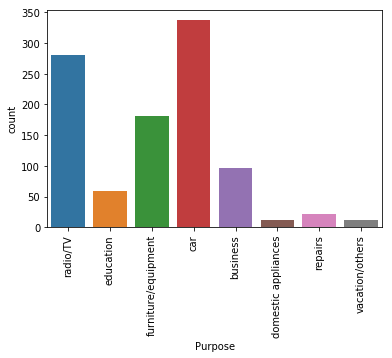

In [56]:
sns.countplot(x='Purpose', data=german_dataset)
plt.xticks(rotation=90)

In [128]:
german_dataset['Risk']

KeyError: 'Risk'

In [122]:
german_dataset.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,0


In [124]:
sns.countplot(x='Purpose', hue='Risk', data=german_dataset)
plt.xticks(rotation=90)

ValueError: Could not interpret input 'Risk'

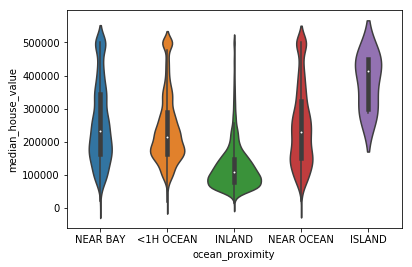

In [111]:
sns.violinplot(x='ocean_proximity', y='median_house_value', data=housing_data)